In [123]:
%matplotlib inline

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import statistics

In [125]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [126]:
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [127]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [128]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [129]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [130]:
sum(city_data_df["type"]=="Urban")

66

In [131]:
sum(city_data_df["type"]=="Suburban")

36

In [132]:
sum(city_data_df["type"]=="Rural")

18

In [133]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [134]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [135]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [150]:
#BOTH DATAFRAMES DON'T CONTAIN NULL VALUES AND HAVE APPROPRIATE DATA TYPES, SO WE CAN NOW MERGE THEM 

In [152]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [154]:
# Create each city type DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [160]:
# Get the number of rides for each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [166]:
# Get average fare for each city in each city type.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean(numeric_only=True)["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean(numeric_only=True)["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean(numeric_only=True)["fare"]

In [170]:
# Get the average number of drivers for every city in each city type.
urban_driver_count = urban_cities_df.groupby(["city"]).mean(numeric_only=True)["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean(numeric_only=True)["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean(numeric_only=True)["driver_count"]

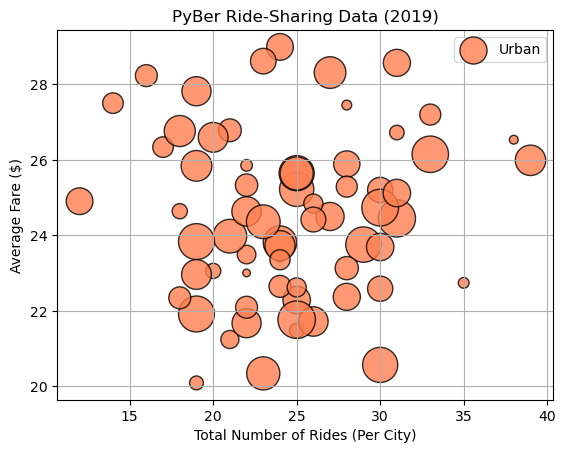

In [179]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
plt.show()

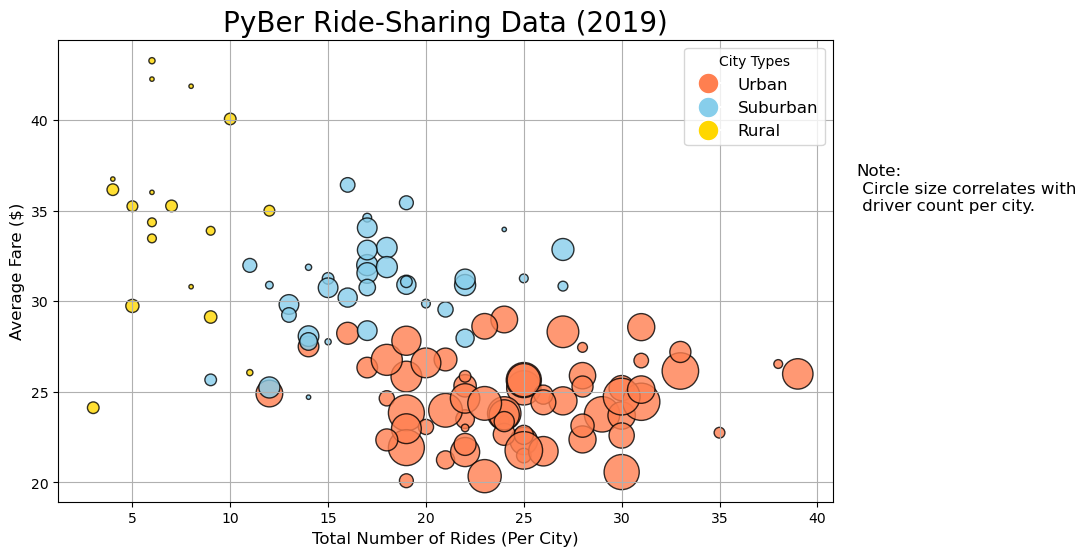

In [193]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
legend_elements = [
    mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='coral', markersize=10, label="Urban"),
    mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label="Suburban"),
    mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=10, label="Rural")
]
lgnd = plt.legend(handles=legend_elements, fontsize=12, loc="best", title="City Types", markerscale=1.5)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\n Circle size correlates with \n driver count per city.", fontsize="12")
#Save the figure
plt.savefig("analysis/Fig1.png", bbox_inches='tight')
# Show the plot
plt.show()